In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

In [2]:
class NeuralNetwork:
    # initialization
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # learning rate
        self.lr = learningrate
        
        # initialization of weight martices
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # activation function
        self.activation_function = scipy.special.expit
        
        # inverse activation function
        self.inverse_activation_function = scipy.special.logit
    
    # training
    def train(self, input_list, target_list):
        # transform input and target lists
        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T
        
        # hidden layer inputs
        hidden_inputs = np.dot(self.wih, inputs)
        # hidden layer outputs
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # final (output) layer inputs
        final_inputs = np.dot(self.who, hidden_outputs)
        # final (output) layer outputrs (final results)
        final_outputs = self.activation_function(final_inputs)
        
        # error = target_value - actual_value
        output_errors = targets - final_outputs
        
        # hidden layer errors are output_errors distributed 
        # in proportion to the weighting factors of the links
        # and recombined on the hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # update the weights between hidden and output (final) layers
        self.who += self.lr * np.dot(output_errors * final_outputs * (1.0 - final_outputs), np.transpose(hidden_outputs))
        # update the weights between input and hidden layers
        self.wih += self.lr * np.dot(hidden_errors * hidden_outputs * (1.0 - hidden_outputs), np.transpose(inputs))
    
    # query for nodes outputs
    def query(self, input_list):
        # transform list to 2D-array to be able to perform matrix operations
        inputs = np.array(input_list, ndmin=2).T
        
        # hidden layer inputs
        hidden_inputs = np.dot(self.wih, inputs)
        # hidden layer outputs
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # final (output) layer inputs
        final_inputs = np.dot(self.who, hidden_outputs)
        # final (output) layer outputrs (final results)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    # backquery the neural network to get inputs based on outputs
    def backquery(self, target_list):
        # transpose the targets list to a vertical array
        final_outputs = np.array(target_list, ndmin=2).T
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)
        # calculater the signal out of the hidden layer
        hidden_outputs = np.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to 0.99
        hidden_outputs -= np.min(hidden_outputs)
        hidden_outputs /= np.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        # calculate the signal out of the input layer
        inputs = np.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to 0.99
        inputs -= np.min(inputs)
        inputs /= np.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

In [3]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

learning_rate = 0.3

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [4]:
n.query([1., .5, -1.5])

array([[0.43789904],
       [0.64244174],
       [0.71707436]])

In [5]:
data_file = open('../data/mnist_train_100.csv', 'r')
data_list = data_file.readlines()
data_file.close()

In [6]:
len(data_list)

100

In [7]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

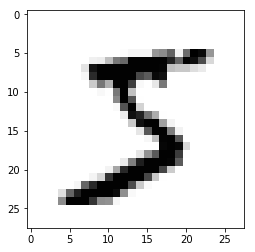

In [8]:
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation=None);

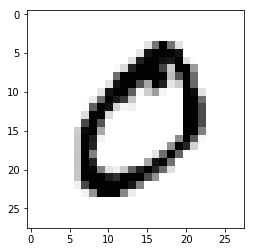

In [9]:
all_values = data_list[1].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation=None);

In [10]:
# scale input data from 0.01 to 1.00 - that's because we must avoid 0.00 as input data
scaled_data = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_data)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [11]:
# form correct output data
onodes = 10
targets = np.zeros(onodes) + 0.1  # it cannot be 0.0 becouse of our activation function
targets[int(all_values[0])] = 0.99     # it cannot be 1.0 becouse of our activation function
print(targets)

[0.99 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1 ]


Let's train our neural network by using 100 samples from MNIST dataset

In [14]:
# create a new instance of neural network
input_nodes = 784  # 28 x 28
hidden_nodes = 100
output_nodes = 10  # 10 target values
learning_rate = 0.3

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [15]:
# load data
training_data_file = open('../data/mnist_train_100.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [3]:
def train(training_data):
    for sample in training_data:
        all_values = sample.split(',')
        # scale data
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # targets
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

In [6]:
train(training_data_list)

Now we can see how our neural network can predict targets

In [17]:
# Load test dataset
test_data_file = open('../data/mnist_test_10.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [17]:
# Let's have a look at the first sample value
all_values = test_data_list[0].split(',')
print(all_values[0])

7


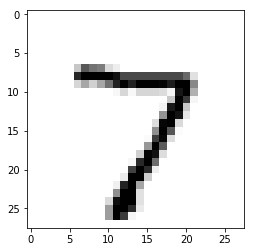

In [18]:
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
plt.imshow(image_array, cmap='Greys');

In [19]:
# Try to predict the same value by using our neural network
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.083396  ],
       [0.03278785],
       [0.02512387],
       [0.12919658],
       [0.02163404],
       [0.030208  ],
       [0.00371443],
       [0.85102992],
       [0.06794699],
       [0.03654935]])

As we can see - prediction is correct! 0.8837... (the highest value) for number 7

Predict all values for our small MNIST test set:

In [4]:
def predict(test_data, verbose=True):
    global scorecard
    global predictions
    scorecard = []
    predictions = np.array([], dtype='int64')
    for sample in test_data:
        all_values = sample.split(',')
        correct_label = all_values[0]
        if verbose:
            print("Correct label: ", correct_label)
        inputs = np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
        outputs = n.query(inputs)
        predicted_label = np.argmax(outputs)
        predictions = np.append(predictions, predicted_label)
        if verbose:
            print("Predicted label: ", predicted_label)
        if predicted_label == int(correct_label):
            scorecard.append(1)
        else:
            scorecard.append(0)

In [21]:
predict(test_data_list)

Correct label:  7
Predicted label:  7
Correct label:  2
Predicted label:  0
Correct label:  1
Predicted label:  1
Correct label:  0
Predicted label:  0
Correct label:  4
Predicted label:  4
Correct label:  1
Predicted label:  1
Correct label:  4
Predicted label:  4
Correct label:  9
Predicted label:  4
Correct label:  5
Predicted label:  8
Correct label:  9
Predicted label:  7


In [22]:
print(scorecard)
print("Accuracy: ", np.mean(scorecard))

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
Accuracy:  0.6


Let's use full MNIST dataset to train our neural network and predict values:

In [8]:
with open(r'G:\MNIST\mnist_train.csv', 'r') as train_data:
    train(train_data)

And now, we're going to predict some values by using a big MNIST test dataset (10 000 samples). At the end of the prediction we'll print result score for our simple neural network:

In [24]:
with open(r'G:\MNIST\mnist_test.csv', 'r') as test_data:
    predict(test_data, verbose=False)
print("Accuracy: ", np.mean(scorecard))

Accuracy:  0.9475


94% - not bad for a such simple neural network

In [7]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

In [26]:
correct_answers = pd.read_csv(r'G:\MNIST\mnist_test.csv', header=None)[0].values

In [27]:
correct_answers

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [28]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

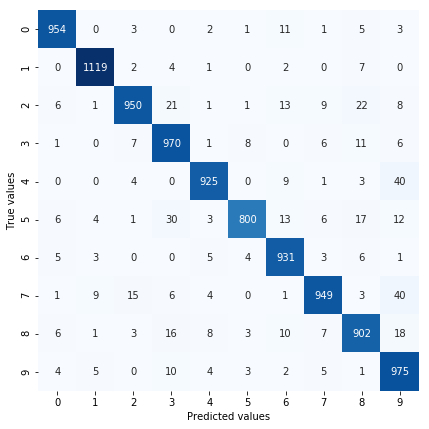

In [29]:
confusion = confusion_matrix(correct_answers, predictions)
plt.figure(figsize=(7, 7))
sns.heatmap(confusion, square=True, annot=True, fmt='d', cbar=False, cmap=plt.cm.Blues,
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel("Predicted values")
plt.ylabel("True values");

As we can see the majority of our test samples were predicted correctly. For the sake of interest let's have a look at the picture of digit 0 that was predicted as 2:

In [30]:
# find the index we need in the test dataset
corr_zeroes = pd.DataFrame(np.argwhere(correct_answers == 0), columns=['Index'])
predicted_fives = pd.DataFrame(np.argwhere(predictions == 2), columns=['Index'])
index = pd.merge(corr_zeroes, predicted_fives).values
index

array([[1843],
       [2972],
       [6428]], dtype=int64)

Let's extract this value:

In [31]:
with open(r'G:\MNIST\mnist_test.csv', 'r') as test_data:
    for i, line in enumerate(test_data):
        if i == index[0][0]:
            print("Correct value: ", line[0])
            check_sample = np.asfarray(line.split(',')[1:]).reshape((28, 28))
            break

Correct value:  0


This is digit 0 that was predicted as digit 2: 

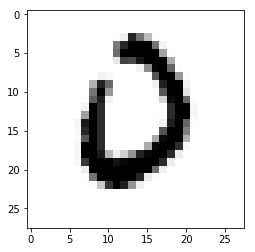

In [32]:
plt.imshow(check_sample, cmap='Greys', interpolation=None);

Probably our neural network made a mistake because of a gap in the upper left quarter of this 0 digit. Such pattern with a gap is not common for 0 digits, but it's OK for didit 2 - that's how our model thinks (probably).

### Selecting the best learning rate value

We used learning rate as 0.3 before. Let's check is there some better value for this parameter:

In [11]:
lr_values = [0.01, 0.1, 0.3, 0.6, 0.9]
accuracy_list = []

for lr in lr_values:
    n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)
    with open(r'G:\MNIST\mnist_test.csv', 'r') as test_data, open(r'G:\MNIST\mnist_train.csv', 'r') as train_data:
        train(train_data)
        predict(test_data, verbose=False)
        accuracy_list.append(np.mean(scorecard))
print(accuracy_list)

[0.919, 0.9537, 0.9432, 0.8982, 0.8593]


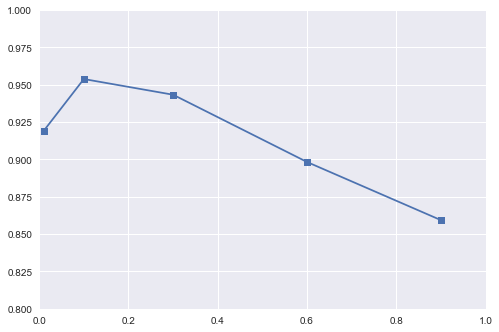

In [18]:
with plt.style.context('seaborn'):
    plt.plot(lr_values, accuracy_list, marker='s')
    plt.xlim(0, 1)
    plt.ylim(0.8, 1)

As we can see - the best learning rate value is 0.1. If we use values lower then 0.1 - gradient steps are too little and we can't reach the minimum of the error function. If we use values higher than 0.1 - gradient steps are too big and we 'step over' the minimum of the error function.

### Several epochs

We are going to train our model several times by using the same training data - it means that the model will have more chances to set its weights to the right values.

In [35]:
# create a model
learning_rates = [0.1, 0.3]
accuracy_lists = dict(zip(learning_rates, ([], [])))

for lr in learning_rates:
    n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)
    n_epochs = 20
    for epoch in range(n_epochs):
        with open(r'G:\MNIST\mnist_test.csv', 'r') as test_data, open(r'G:\MNIST\mnist_train.csv', 'r') as train_data:
            train(train_data)
            predict(test_data, verbose=False)
            accuracy_lists[lr].append(np.mean(scorecard))
    print("Learning rate = {}:\n{}".format(lr, accuracy_lists[lr]))

[0.9505, 0.9608, 0.9627, 0.9645, 0.9672, 0.9662, 0.9669, 0.9671, 0.9687, 0.9702, 0.9694, 0.9684, 0.9674, 0.968, 0.9674, 0.9666, 0.9654, 0.9653, 0.965, 0.9641]
[0.9456, 0.9515, 0.9437, 0.9504, 0.9488, 0.9499, 0.9437, 0.9413, 0.9493, 0.9485, 0.9492, 0.9459, 0.9411, 0.9441, 0.9456, 0.9473, 0.9491, 0.9469, 0.9495, 0.9455]


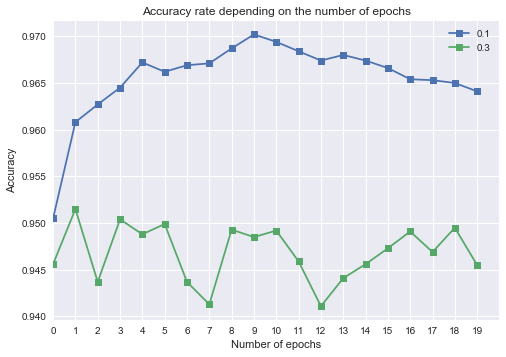

In [37]:
with plt.style.context('seaborn'):
    for lr, accuracy_list in accuracy_lists.items():
        plt.plot(list(range(n_epochs)), accuracy_list, marker='s', label=str(lr))
        plt.xlim(0, n_epochs)
        plt.xticks(range(0, 20, 1))
    plt.legend(loc='best')
    plt.ylabel("Accuracy")
    plt.xlabel("Number of epochs")
    plt.title("Accuracy rate depending on the number of epochs");

In [38]:
np.max(accuracy_lists[0.1])

0.9702

In [39]:
np.argmax(accuracy_lists[0.1])

9

It means that we can get the best results with learning rate = 0.1 and number of epochs = 9. 
Also let's try to change hidden layer structure - we want to know what is the best number of hidden neurons to get the best accuracy score:

In [43]:
input_nodes = 784  # 28 x 28
hidden_nodes_list = [100, 200, 300, 500, 700]
output_nodes = 10  # 10 target values
learning_rate = 0.1

accuracy_lists = dict(zip(hidden_nodes_list, ([], [], [], [], [])))

{100: [], 200: [], 300: [], 500: [], 700: []}

In [44]:
# train our neural network and see the results
for hidden_nodes in hidden_nodes_list:
    n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
    with open(r'G:\MNIST\mnist_test.csv', 'r') as test_data, open(r'G:\MNIST\mnist_train.csv', 'r') as train_data:
        train(train_data)
        predict(test_data, verbose=False)
        accuracy_lists[hidden_nodes].append(np.mean(scorecard))
print(accuracy_lists)

{100: [0.9446], 200: [0.9599], 300: [0.96], 500: [0.9615], 700: [0.9574]}


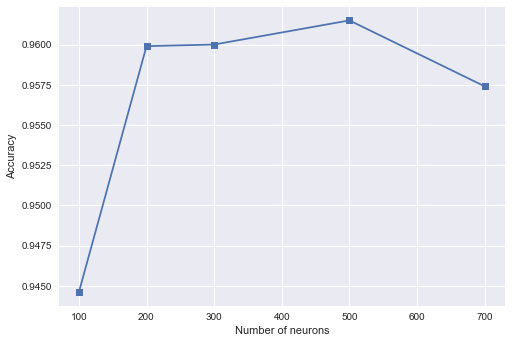

In [45]:
with plt.style.context('seaborn'):
    plt.plot(accuracy_lists.keys(), accuracy_lists.values(), marker='s')
    plt.xlabel("Number of neurons")
    plt.ylabel("Accuracy");

In [5]:
input_nodes = 784  # 28 x 28
hidden_nodes = 500
output_nodes = 10  # 10 target values
learning_rate = 0.1
n_epochs = 9

In [6]:
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

for epoch in range(n_epochs):
    with open(r'G:\MNIST\mnist_test.csv', 'r') as test_data, open(r'G:\MNIST\mnist_train.csv', 'r') as train_data:
        train(train_data)
        predict(test_data, verbose=False)
print("Accuracy: {:.3f}".format(np.mean(scorecard)))

Accuracy: 0.976


Almost 98% of accuracy - it's a very good result. It takes about 45 minutes to teach a neural network with 500 hidden neurons and 9 epochs. So it make sense to save learned neural network instance in shelve db to be able to import it in the future.

In [7]:
import shelve

In [8]:
shelve_db = shelve.open('../data/shelve_db')

In [9]:
shelve_db['neural_network'] = n

In [10]:
shelve_db.close()

Let's have a look at how out neural network 'sees' different digits. We're going to use neural network's backquery method for this purpose:

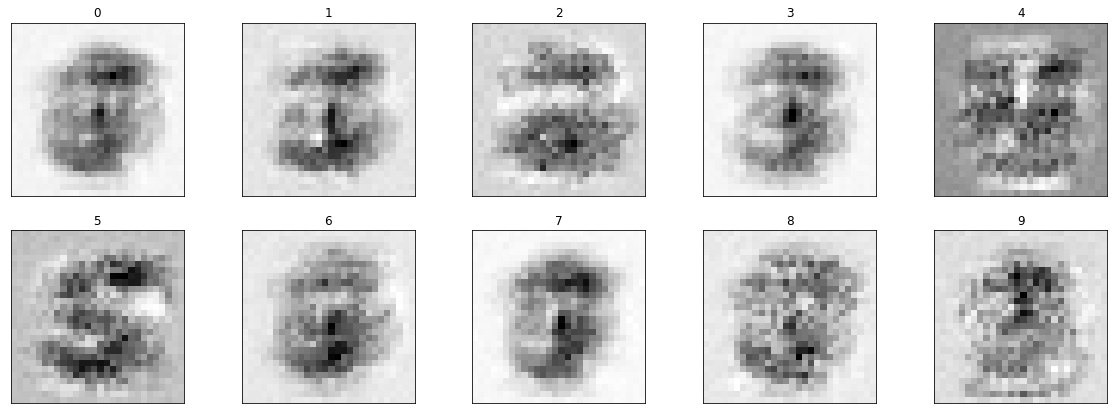

In [58]:
fig, axes = plt.subplots(2, 5, figsize=(20, 7), subplot_kw={'xticks': (), 'yticks': ()})

labels = list(range(10))
targets = {}
for label in labels:
    target = np.zeros(output_nodes) + 0.01
    target[label] = 0.99
    targets[label] = target

for (label, target), ax in zip(targets.items(), axes.ravel()):
    image_data = n.backquery(target)
    ax.imshow(image_data.reshape(28, 28), cmap='Greys')
    ax.set_title(label)